In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
import requests
import pandas as pd

API_KEY = "80abd4873b30c8d5298a073fd9a29a45c9d64b44"

def get_acs_median_value(year, state_fips, county_fips):
    """
    Download ACS 5-year median home value (B25077_001E)
    for all census tracts in a given county.
    """
    base_url = f"https://api.census.gov/data/{year}/acs/acs5"

    params = {
        "get": "NAME,B25077_001E",
        "for": "tract:*",
        "in": f"state:{state_fips} county:{county_fips}",
        "key": API_KEY
    }

    r = requests.get(base_url, params=params)
    r.raise_for_status()
    data = r.json()

    df = pd.DataFrame(data[1:], columns=data[0])
    df["B25077_001E"] = pd.to_numeric(df["B25077_001E"], errors="coerce")
    df["GEOID"] = df["state"] + df["county"] + df["tract"]
    return df



In [5]:
sf_2020 = get_acs_median_value(2020, "06", "075")  # SF County
la_2020 = get_acs_median_value(2020, "06", "037")  # LA County

In [6]:
#sf_2020.head()
la_2020.head()

,NAME,B25077_001E,state,county,tract,GEOID
0,"Census Tract 1997, Los Angeles County, California",599600,06,037,199700,06037199700
1,"Census Tract 1998.01, Los Angeles County, Cali...",474300,06,037,199801,06037199801
2,"Census Tract 1998.02, Los Angeles County, Cali...",587800,06,037,199802,06037199802
3,"Census Tract 1999, Los Angeles County, California",492700,06,037,199900,06037199900
4,"Census Tract 2011.10, Los Angeles County, Cali...",621500,06,037,201110,06037201110


In [9]:
sf_2020.to_csv("sf_median_value_2020.csv", index=False)
la_2020.to_csv("la_median_value_2020.csv", index=False)


In [11]:
# Let's get 2000, 2010, 2020 for both SF and LA

years = [2010, 2015, 2020]

sf_frames = []
la_frames = []

for y in years:
    print(f"Downloading SF {y}...")
    sf_frames.append(get_acs_median_value(y, "06", "075"))
    sf_frames[-1]["year"]=y

    print(f"Downloading LA {y}...")
    la_frames.append(get_acs_median_value(y, "06", "037"))
    la_frames[-1]["year"]=y

sf_all = pd.concat(sf_frames, ignore_index=True)
la_all = pd.concat(la_frames, ignore_index=True)



In [12]:
#sf_all.head()
la_all.head()

,NAME,B25077_001E,state,county,tract,GEOID,year
0,"Census Tract 1414, Los Angeles County, California",944000.0,06,037,141400,06037141400,2010
1,"Census Tract 1415, Los Angeles County, California",1000001.0,06,037,141500,06037141500,2010
2,"Census Tract 1416, Los Angeles County, California",1000001.0,06,037,141600,06037141600,2010
3,"Census Tract 1417, Los Angeles County, California",1000001.0,06,037,141700,06037141700,2010
4,"Census Tract 1431, Los Angeles County, California",954500.0,06,037,143100,06037143100,2010


In [13]:
sf_all.to_csv("sf_tract_median_value_2010_2020.csv", index=False)
la_all.to_csv("la_tract_median_value_2010_2020.csv", index=False)

In [14]:
# Hayes Valley tracts (Central Freeway removal zone)
hayes_tracts = [
    "06075016600",
    "06075016700",
    "06075016800",
    "06075016900",
    "06075017000"
]

# Embarcadero / Downtown waterfront tracts (former Embarcadero Freeway corridor)
embarcadero_tracts = [
    "06075010100",
    "06075010200",
    "06075010300",
    "06075010400",
    "06075010500",
    "06075010601",
    "06075010602"
]

# Combine into ONE “freeway-removal area” list
sf_freeway_tracts = hayes_tracts + embarcadero_tracts

# Filter your full SF dataset
sf_freeway = sf_all[sf_all["GEOID"].isin(sf_freeway_tracts)]
sf_freeway.head()


,NAME,B25077_001E,state,county,tract,GEOID,year
0,"Census Tract 101, San Francisco County, Califo...",726900.0,06,075,010100,06075010100,2010
1,"Census Tract 102, San Francisco County, Califo...",1000001.0,06,075,010200,06075010200,2010
2,"Census Tract 103, San Francisco County, Califo...",1000001.0,06,075,010300,06075010300,2010
3,"Census Tract 104, San Francisco County, Califo...",838300.0,06,075,010400,06075010400,2010
4,"Census Tract 105, San Francisco County, Califo...",1000001.0,06,075,010500,06075010500,2010


In [15]:
sf_freeway_by_year = sf_freeway.groupby("year")["B25077_001E"].mean()
sf_freeway_by_year.head()

year
2010    9.235338e+05
2015    1.015944e+06
2020    1.379560e+06
Name: B25077_001E, dtype: float64

In [21]:
import requests 

import pandas as pd 

 

API_KEY = "80abd4873b30c8d5298a073fd9a29a45c9d64b44"   # your key 

 

def get_acs_median_value(year, state_fips, county_fips): 

    """ 

    Download ACS 5-year median home value (B25077_001E) 

    for all census tracts in a given county & attach a year column. 

    """ 

    base_url = f"https://api.census.gov/data/{year}/acs/acs5" 

    params = { 

        "get": "NAME,B25077_001E", 

        "for": "tract:*", 

        "in": f"state:{state_fips} county:{county_fips}", 

        "key": API_KEY 

    } 

 

    r = requests.get(base_url, params=params) 

    r.raise_for_status() 

    data = r.json() 

 

    df = pd.DataFrame(data[1:], columns=data[0]) 

    df["B25077_001E"] = pd.to_numeric(df["B25077_001E"], errors="coerce") 

    df["GEOID"] = df["state"] + df["county"] + df["tract"] 

    df["year"] = year          

    return df 

In [23]:
la_years = [2010, 2015, 2020] 

la_frames = [] 

 

for y in la_years: 

    print(f"Downloading LA {y}...") 

    df_la = get_acs_median_value(y, "06", "037")  # 06 = CA, 037 = Los Angeles County 

    la_frames.append(df_la) 

 

la_all = pd.concat(la_frames, ignore_index=True) 

 

la_all.head() 

,NAME,B25077_001E,state,county,tract,GEOID,year
0,"Census Tract 1414, Los Angeles County, California",944000.0,06,037,141400,06037141400,2010
1,"Census Tract 1415, Los Angeles County, California",1000001.0,06,037,141500,06037141500,2010
2,"Census Tract 1416, Los Angeles County, California",1000001.0,06,037,141600,06037141600,2010
3,"Census Tract 1417, Los Angeles County, California",1000001.0,06,037,141700,06037141700,2010
4,"Census Tract 1431, Los Angeles County, California",954500.0,06,037,143100,06037143100,2010


In [24]:
# --- LA CORRIDOR: Northridge + Reseda + Palms (freeway damage area) --- 

# Tract codes taken from LA Almanac neighborhood-to-tract mapping. 

 

northridge_tracts = [ 

    "1112.04", "1112.05", "1112.06", "1113.02", 

    "1133.01", "1134.24", 

    "1151.01", "1151.03", "1151.04", 

    "1152.02", "1152.03", "1152.04", 

    "1153.01", "1153.02", 

    "1154.01", "1154.03", 

    "1173.02", "1312" 

] 

 

reseda_tracts = [ 

    "1310.21", "1310.22", "1310.23", "1310.24", 

    "1313", "1314", "1316", 

    "1317.01", "1317.02", 

    "1318.01", "1318.02", 

    "1323.01", "1323.02", 

    "1325.01", "1325.02", 

    "1327", "1330" 

] 

 

palms_tracts = [ 

    "2699.03", "2699.05", "2699.06", "2699.07", 

    "2699.08", "2699.09", 

    "2701.01", "2701.02", 

    "2718.01", "2718.03", "2718.04" 

] 

 

la_neighborhood_codes = northridge_tracts + reseda_tracts + palms_tracts 

 

def laalmanac_to_tractce(code_str): 

    """ 

    Convert LA Almanac-style tract IDs (e.g., '1112.04', '1313') 

    into 6-digit Census tract codes that match la_all['tract'] (e.g., '111204', '131300'). 

    """ 

    s = str(code_str) 

    parts = s.split(".") 

    main = parts[0]              # e.g. '1112' 

    if len(parts) == 2: 

        suffix = parts[1].ljust(2, "0")  # '04' -> '04', '4' -> '40' 

    else: 

        suffix = "00"            # no decimal -> '00' 

    main4 = main.zfill(4)        # ensure 4-digit main part 

    return main4 + suffix        # e.g. '1112' + '04' -> '111204' 

 

la_corridor_tractces = [laalmanac_to_tractce(c) for c in la_neighborhood_codes] 

 

# Filter LA to just those tracts 

la_corridor_df = la_all[la_all["tract"].isin(la_corridor_tractces)] 

 

# Look at the first few rows to sanity check 

la_corridor_df.head() 

 

,NAME,B25077_001E,state,county,tract,GEOID,year
349,"Census Tract 1112.04, Los Angeles County, Cali...",733900.0,06,037,111204,06037111204,2010
350,"Census Tract 1112.05, Los Angeles County, Cali...",543300.0,06,037,111205,06037111205,2010
351,"Census Tract 1112.06, Los Angeles County, Cali...",616100.0,06,037,111206,06037111206,2010
353,"Census Tract 1113.02, Los Angeles County, Cali...",580300.0,06,037,111302,06037111302,2010
366,"Census Tract 1133.01, Los Angeles County, Cali...",794900.0,06,037,113301,06037113301,2010


In [25]:
la_corridor_df = la_corridor_df[la_corridor_df["B25077_001E"] > 0] 
la_corridor_by_year = la_corridor_df.groupby("year")["B25077_001E"].mean() 

la_corridor_by_year 

year
2010    524481.481481
2015    464848.148148
2020    651190.243902
Name: B25077_001E, dtype: float64

In [29]:
la_corridor_df.shape

(95, 7)

In [31]:
la_corridor_df = la_all[la_all["tract"].isin(la_corridor_tractces)].copy() 

 

la_corridor_df.shape 

(104, 7)

In [33]:
import numpy as np 

  

# 1. Rebuild the LA corridor from the original full LA data 

#    (same tract list you used before for Northridge + I-10) 

la_corridor_clean = la_all[la_all["tract"].isin(la_corridor_tractces)].copy() 

  

# 2. Force the columns to be numeric 

la_corridor_clean["B25077_001E"] = pd.to_numeric( 

    la_corridor_clean["B25077_001E"], errors="coerce" 

) 

la_corridor_clean["year"] = pd.to_numeric( 

    la_corridor_clean["year"], errors="coerce" 

) 

  

# 3. Drop rows with missing median value or year 

la_corridor_clean = la_corridor_clean.dropna(subset=["B25077_001E", "year"]) 

  

# 4. Remove impossible / sentinel values 

#    (Census uses big negative codes for suppressed data) 

la_corridor_clean = la_corridor_clean[ 

    (la_corridor_clean["B25077_001E"] > 0) & 

    (la_corridor_clean["B25077_001E"] < 1e7)   # under $10 million just to be safe 

] 

  

# Quick sanity check 

print(la_corridor_clean["B25077_001E"].describe()) 

count    9.500000e+01
mean     5.622179e+05
std      1.755342e+05
min      2.328000e+05
25%      4.428500e+05
50%      5.483000e+05
75%      6.259000e+05
max      1.204200e+06
Name: B25077_001E, dtype: float64


In [35]:
la_corridor_by_year = la_corridor_clean.groupby("year")["B25077_001E"].mean() 

la_corridor_by_year 

year
2010    524481.481481
2015    464848.148148
2020    651190.243902
Name: B25077_001E, dtype: float64

In [37]:
la_corridor_by_year.apply(lambda x: f"${x:,.0f}") 

year
2010    $524,481
2015    $464,848
2020    $651,190
Name: B25077_001E, dtype: object

In [39]:
# Inflation factors to convert values into 2020 dollars (CPI-U) 

inflation = { 

    2010: 260.280 / 218.056,  # = 1.194 

    2015: 260.280 / 237.017,  # = 1.098 

    2020: 1.0                 # 2020 dollars already 

} 
inflation
 



 

{2010: 1.1936383314377956, 2015: 1.0981490779142424, 2020: 1.0}

In [41]:
sf_real = sf_freeway_by_year * sf_freeway_by_year.index.map(inflation) 

sf_real 

year
2010    1.102365e+06
2015    1.115658e+06
2020    1.379560e+06
dtype: float64

In [43]:
inflation = { 

    2010: 260.280 / 218.056, 

    2015: 260.280 / 237.017, 

    2020: 1.0 

} 

 

sf_real = sf_freeway_by_year * sf_freeway_by_year.index.map(inflation) 

sf_real 

year
2010    1.102365e+06
2015    1.115658e+06
2020    1.379560e+06
dtype: float64

In [45]:
la_real = la_corridor_by_year * la_corridor_by_year.index.map(inflation) 

la_real 

year
2010    626041.200426
2015    510472.565259
2020    651190.243902
dtype: float64

In [47]:
comparison = pd.DataFrame({
    "SF_nominal": sf_freeway_by_year,
    "SF_real_2020": sf_real,
    "LA_nominal": la_corridor_by_year,
    "LA_real_2020": la_real
})

comparison

,SF_nominal,SF_real_2020,LA_nominal,LA_real_2020
year,,,,
2010,9.235338e+05,1.102365e+06,524481.481481,626041.200426
2015,1.015944e+06,1.115658e+06,464848.148148,510472.565259
2020,1.379560e+06,1.379560e+06,651190.243902,651190.243902


In [49]:
# Percent change for 2010→2015 and 2015→2020 

pct_10_15 = (comparison.loc[2015] - comparison.loc[2010]) / comparison.loc[2010] * 100 

pct_15_20 = (comparison.loc[2020] - comparison.loc[2015]) / comparison.loc[2015] * 100 

 

pct_intervals = pd.DataFrame({ 

    "Percent_change_2010_2015_%": pct_10_15.round(1), 

    "Percent_change_2015_2020_%": pct_15_20.round(1) 

}) 

 

pct_intervals 

 

,Percent_change_2010_2015_%,Percent_change_2015_2020_%
SF_nominal,10.0,35.8
SF_real_2020,1.2,23.7
LA_nominal,-11.4,40.1
LA_real_2020,-18.5,27.6


In [51]:
# Years between each interval 

years_10_15 = 5 

years_15_20 = 5 

 

cagr_10_15 = (comparison.loc[2015] / comparison.loc[2010]) ** (1/years_10_15) - 1 

cagr_15_20 = (comparison.loc[2020] / comparison.loc[2015]) ** (1/years_15_20) - 1 

 

cagr_intervals = pd.DataFrame({ 

    "CAGR_2010_2015_%": (cagr_10_15 * 100).round(2), 

    "CAGR_2015_2020_%": (cagr_15_20 * 100).round(2) 

}) 

 

cagr_intervals 

 

,CAGR_2010_2015_%,CAGR_2015_2020_%
SF_nominal,1.93,6.31
SF_real_2020,0.24,4.34
LA_nominal,-2.39,6.97
LA_real_2020,-4.00,4.99


In [53]:
pct_pretty = pct_intervals.applymap(lambda x: f"{x:.1f}%") 

cagr_pretty = cagr_intervals.applymap(lambda x: f"{x:.2f}%") 

 

pct_pretty, cagr_pretty 

C:\Users\Owner\AppData\Local\Temp\ipykernel_14664\2826308082.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pct_pretty = pct_intervals.applymap(lambda x: f"{x:.1f}%")
C:\Users\Owner\AppData\Local\Temp\ipykernel_14664\2826308082.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cagr_pretty = cagr_intervals.applymap(lambda x: f"{x:.2f}%")


(             Percent_change_2010_2015_% Percent_change_2015_2020_%
 SF_nominal                        10.0%                      35.8%
 SF_real_2020                       1.2%                      23.7%
 LA_nominal                       -11.4%                      40.1%
 LA_real_2020                     -18.5%                      27.6%,
              CAGR_2010_2015_% CAGR_2015_2020_%
 SF_nominal              1.93%            6.31%
 SF_real_2020            0.24%            4.34%
 LA_nominal             -2.39%            6.97%
 LA_real_2020           -4.00%            4.99%)

In [55]:
from pathlib import Path

home = Path.home()
print("HOME =", home)

candidates = [
    home / "OneDrive",
    home / "OneDrive - University of Iowa",
    home / "OneDrive - The University of Iowa",
    home / "OneDrive - Gypsy - University of Iowa",
    home / "OneDrive - Gypsy",
]

for p in candidates:
    print(("FOUND " if p.exists() else "MISS  "), p)


HOME = C:\Users\Owner
FOUND  C:\Users\Owner\OneDrive
FOUND  C:\Users\Owner\OneDrive - University of Iowa
MISS   C:\Users\Owner\OneDrive - The University of Iowa
MISS   C:\Users\Owner\OneDrive - Gypsy - University of Iowa
MISS   C:\Users\Owner\OneDrive - Gypsy


<Figure size 600x400 with 0 Axes>

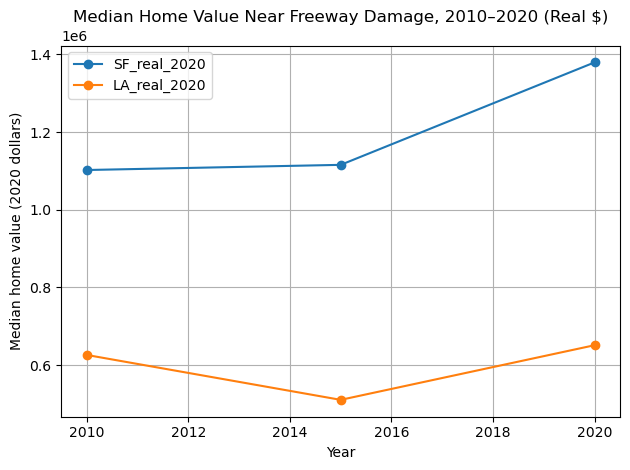

Saved to: C:\Users\Owner\OneDrive - University of Iowa\Gypsy - University of Iowa\Bo\Research_Project\fig_real_home_values_trend.png


In [57]:
import matplotlib.pyplot as plt
from pathlib import Path

# --- DEFINE OUTPUT DIRECTORY ONCE ---
OUTPUT_DIR = Path(r"C:\Users\Owner\OneDrive - University of Iowa\Gypsy - University of Iowa\Bo\Research_Project")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

# --- CREATE FIGURE ---
plt.figure(figsize=(6, 4))

comparison[["SF_real_2020", "LA_real_2020"]].plot(marker="o")

plt.ylabel("Median home value (2020 dollars)")
plt.xlabel("Year")
plt.title("Median Home Value Near Freeway Damage, 2010–2020 (Real $)")
plt.grid(True)
plt.tight_layout()

# --- SAVE + EXPORT ---
plt.savefig(
    OUTPUT_DIR / "fig_real_home_values_trend.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

print("Saved to:", OUTPUT_DIR / "fig_real_home_values_trend.png")


In [59]:
pct_change = comparison[["SF_real_2020", "LA_real_2020"]].pct_change() * 100 

pct_change 

,SF_real_2020,LA_real_2020
year,,
2010,NaN,NaN
2015,1.205874,-18.460228
2020,23.654331,27.566159


In [61]:
import numpy as np 

 

def cagr(start, end, years): 

    return (end / start) ** (1 / years) - 1 

 

cagr_2010_2015 = { 

    "SF": cagr(sf_real.loc[2010], sf_real.loc[2015], 5), 

    "LA": cagr(la_real.loc[2010], la_real.loc[2015], 5) 

} 

 

cagr_2015_2020 = { 

    "SF": cagr(sf_real.loc[2015], sf_real.loc[2020], 5), 

    "LA": cagr(la_real.loc[2015], la_real.loc[2020], 5) 

} 

 

cagr_2010_2015, cagr_2015_2020 

 

({'SF': 0.002400198514340479, 'LA': -0.03999410874442211},
 {'SF': 0.043378459566473904, 'LA': 0.04989796947897429})

In [63]:
sf_real   # SF freeway corridor, 2010, 2015, 2020 in 2020 dollars 

la_real   # LA Northridge + I-10 corridor, 2010, 2015, 2020 in 2020 dollars 

year
2010    626041.200426
2015    510472.565259
2020    651190.243902
dtype: float64

In [65]:
import numpy as np 

import pandas as pd 

import matplotlib.pyplot as plt 

 

# Make sure the series are sorted by year 

sf_real = sf_real.sort_index() 

la_real = la_real.sort_index() 

 

# Define intervals and labels 

intervals = [(2010, 2015), (2015, 2020)] 

labels = ["2010–2015", "2015–2020"] 

 

pct_data = [] 

cagr_data = [] 

 

for start, end in intervals: 

    sf_start, sf_end = sf_real.loc[start], sf_real.loc[end] 

    la_start, la_end = la_real.loc[start], la_real.loc[end] 

 

    # Percent change over the whole interval 

    sf_pct = (sf_end - sf_start) / sf_start * 100 

    la_pct = (la_end - la_start) / la_start * 100 

 

    # CAGR = (end/start)^(1/years) - 1 

    years = end - start 

    sf_cagr = (sf_end / sf_start)**(1 / years) - 1 

    la_cagr = (la_end / la_start)**(1 / years) - 1 

 

    pct_data.append((sf_pct, la_pct)) 

    cagr_data.append((sf_cagr, la_cagr)) 

 

# Put into DataFrames for easy viewing / plotting 

pct_df = pd.DataFrame(pct_data, index=labels, columns=["SF_pct", "LA_pct"]) 

cagr_df = pd.DataFrame(cagr_data, index=labels, columns=["SF_cagr", "LA_cagr"]) 

 

pct_df, cagr_df 

 

(              SF_pct     LA_pct
 2010–2015   1.205874 -18.460228
 2015–2020  23.654331  27.566159,
             SF_cagr   LA_cagr
 2010–2015  0.002400 -0.039994
 2015–2020  0.043378  0.049898)

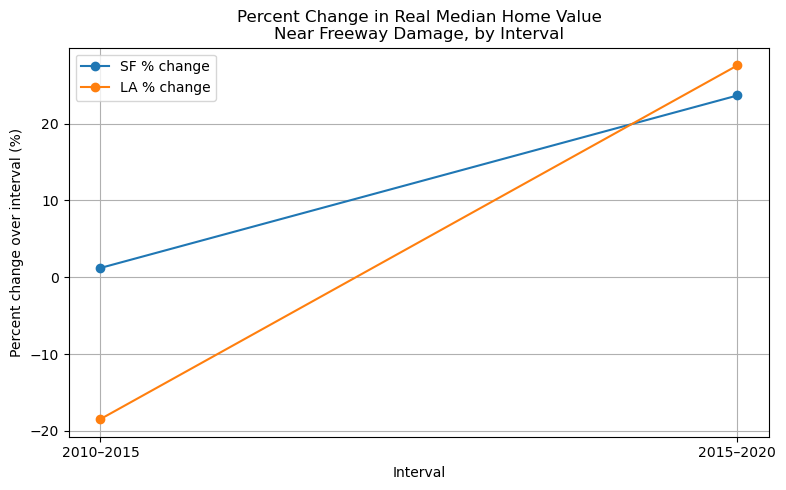

Saved to: C:\Users\Owner\OneDrive - University of Iowa\Gypsy - University of Iowa\Bo\Research_Project\fig_percent_change_intervals.png
File exists: True


In [67]:
# --- CREATE FIGURE ---
fig, ax = plt.subplots(figsize=(8,5))

intervals = ["2010–2015", "2015–2020"]
x = np.arange(len(intervals))

ax.plot(x, pct_df["SF_pct"].values, marker="o", label="SF % change")
ax.plot(x, pct_df["LA_pct"].values, marker="o", label="LA % change")

ax.set_xticks(x)
ax.set_xticklabels(intervals)
ax.set_ylabel("Percent change over interval (%)")
ax.set_xlabel("Interval")
ax.set_title("Percent Change in Real Median Home Value\nNear Freeway Damage, by Interval")
ax.legend()
ax.grid(True)

plt.tight_layout()

# --- SAVE + EXPORT ---
out_file = OUTPUT_DIR / "fig_percent_change_intervals.png"
plt.savefig(out_file, dpi=300, bbox_inches="tight")
plt.show()

print("Saved to:", out_file)
print("File exists:", out_file.exists())


In [69]:
import numpy as np 

 

years = ["2010–2015", "2015–2020"] 

x = np.arange(len(years))   # x = [0, 1] 

width = 0.35                

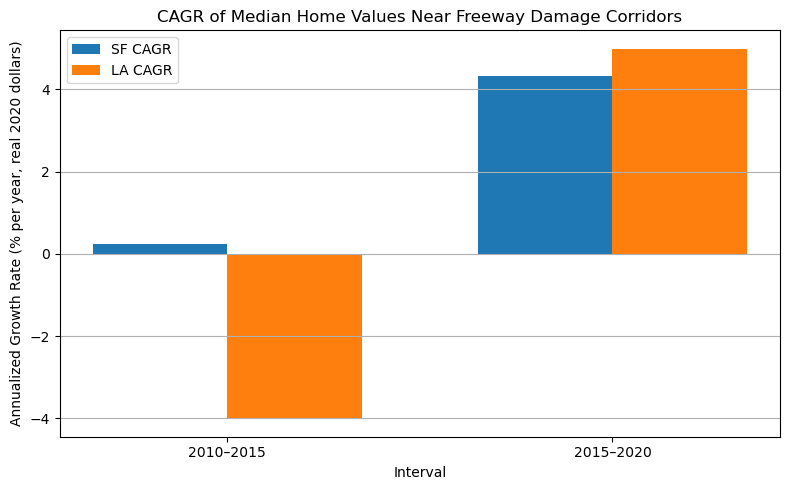

Saved to: C:\Users\Owner\OneDrive - University of Iowa\Gypsy - University of Iowa\Bo\Research_Project\fig_cagr_comparison.png
File exists: True


In [71]:
import numpy as np
import matplotlib.pyplot as plt

# --- CREATE FIGURE ---
fig, ax = plt.subplots(figsize=(8,5))

intervals = ["2010–2015", "2015–2020"]
x = np.arange(len(intervals))
width = 0.35

ax.bar(
    x - width/2,
    cagr_df["SF_cagr"].values * 100,
    width,
    label="SF CAGR"
)

ax.bar(
    x + width/2,
    cagr_df["LA_cagr"].values * 100,
    width,
    label="LA CAGR"
)

ax.set_xticks(x)
ax.set_xticklabels(intervals)
ax.set_ylabel("Annualized Growth Rate (% per year, real 2020 dollars)")
ax.set_xlabel("Interval")
ax.set_title("CAGR of Median Home Values Near Freeway Damage Corridors")
ax.legend()
ax.grid(True, axis="y")

plt.tight_layout()

# --- SAVE + EXPORT ---
out_file = OUTPUT_DIR / "fig_cagr_comparison.png"
plt.savefig(out_file, dpi=300, bbox_inches="tight")
plt.show()

print("Saved to:", out_file)
print("File exists:", out_file.exists())




 

In [73]:
import pandas as pd 

import matplotlib.pyplot as plt 

 

# ----- dollar changes for each interval ----- 

intervals = ["2010–2015", "2015–2020"] 

 

sf_change = [ 

    sf_real.loc[2015] - sf_real.loc[2010], 

    sf_real.loc[2020] - sf_real.loc[2015] 

] 

 

la_change = [ 

    la_real.loc[2015] - la_real.loc[2010], 

    la_real.loc[2020] - la_real.loc[2015] 

] 

 

dollar_change = pd.DataFrame( 

    {"SF_$change": sf_change, 

     "LA_$change": la_change}, 

    index=intervals 

) 

 

# prettier version for copying into Word 

dollar_change_pretty = dollar_change.apply( 

    lambda col: col.map(lambda x: f"${x:,.0f}") 

) 

 

dollar_change_pretty 

,SF_$change,LA_$change
2010–2015,"$13,293","$-115,569"
2015–2020,"$263,902","$140,718"


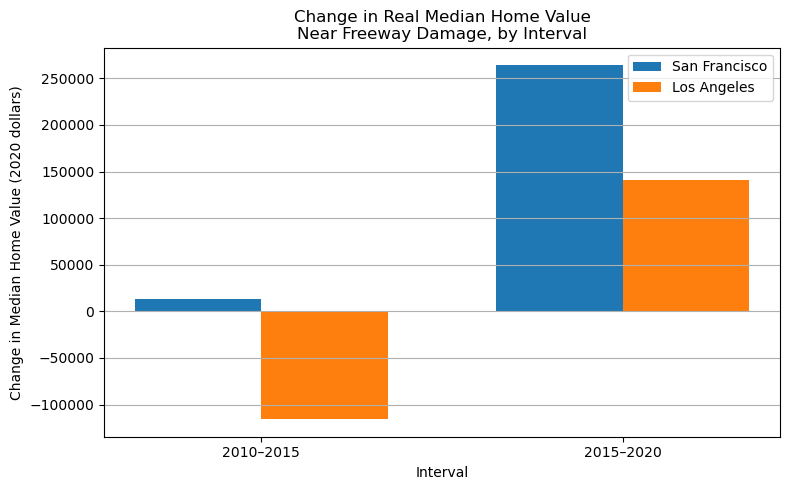

Saved to: C:\Users\Owner\OneDrive - University of Iowa\Gypsy - University of Iowa\Bo\Research_Project\fig_dollar_change.png
File exists: True


In [75]:
# ----- bar chart of dollar changes ----- 

import numpy as np
import matplotlib.pyplot as plt

# --- CREATE FIGURE ---
fig, ax = plt.subplots(figsize=(8,5))

intervals = ["2010–2015", "2015–2020"]
x = np.arange(len(intervals))
width = 0.35

# dollar changes in REAL 2020 dollars
sf_changes = [
    sf_real.loc[2015] - sf_real.loc[2010],
    sf_real.loc[2020] - sf_real.loc[2015]
]

la_changes = [
    la_real.loc[2015] - la_real.loc[2010],
    la_real.loc[2020] - la_real.loc[2015]
]

ax.bar(
    x - width/2,
    sf_changes,
    width,
    label="San Francisco"
)

ax.bar(
    x + width/2,
    la_changes,
    width,
    label="Los Angeles"
)

ax.set_xticks(x)
ax.set_xticklabels(intervals)
ax.set_ylabel("Change in Median Home Value (2020 dollars)")
ax.set_xlabel("Interval")
ax.set_title("Change in Real Median Home Value\nNear Freeway Damage, by Interval")
ax.legend()
ax.grid(True, axis="y")

plt.tight_layout()

# --- SAVE + EXPORT ---
out_file = OUTPUT_DIR / "fig_dollar_change.png"
plt.savefig(out_file, dpi=300, bbox_inches="tight")
plt.show()

print("Saved to:", out_file)
print("File exists:", out_file.exists())


In [77]:
levels_pretty = comparison.apply( 

    lambda col: col.map(lambda x: f"${x:,.0f}") 

) 

 

levels_pretty 

 

,SF_nominal,SF_real_2020,LA_nominal,LA_real_2020
year,,,,
2010,"$923,534","$1,102,365","$524,481","$626,041"
2015,"$1,015,944","$1,115,658","$464,848","$510,473"
2020,"$1,379,560","$1,379,560","$651,190","$651,190"


In [79]:

interval_labels = ["2010–2015", "2015–2020"] 

start_years = [2010, 2015] 

end_years   = [2015, 2020] 

years_in_interval = [5, 5] 

 

sf_pct, la_pct = [], [] 

sf_cagr, la_cagr = [], [] 

 

for start, end, n in zip(start_years, end_years, years_in_interval): 

    sf_start, sf_end = sf_real.loc[start], sf_real.loc[end] 

    la_start, la_end = la_real.loc[start], la_real.loc[end] 

 

    # percent change over the interval 

    sf_pct.append((sf_end - sf_start) / sf_start) 

    la_pct.append((la_end - la_start) / la_start) 

 

    # CAGR (annualized) 

    sf_cagr.append((sf_end / sf_start) ** (1/n) - 1) 

    la_cagr.append((la_end / la_start) ** (1/n) - 1) 

 

pct_intervals = pd.DataFrame( 

    {"SF_pct_change": sf_pct, "LA_pct_change": la_pct}, 

    index=interval_labels 

) 

 

cagr_df = pd.DataFrame( 

    {"SF_cagr": sf_cagr, "LA_cagr": la_cagr}, 

    index=interval_labels 

) 

 

# combine and format nicely 

growth_table = pd.concat([pct_intervals * 100, cagr_df * 100], axis=1) 

growth_pretty = growth_table.apply( 

    lambda col: col.map(lambda x: f"{x:,.2f}%") 

) 

 

growth_pretty 

,SF_pct_change,LA_pct_change,SF_cagr,LA_cagr
2010–2015,1.21%,-18.46%,0.24%,-4.00%
2015–2020,23.65%,27.57%,4.34%,4.99%


In [81]:
dollar_changes = pd.DataFrame({ 

    "2010–2015": [ 

        sf_real.loc[2015] - sf_real.loc[2010], 

        la_real.loc[2015] - la_real.loc[2010] 

    ], 

    "2015–2020": [ 

        sf_real.loc[2020] - sf_real.loc[2015], 

        la_real.loc[2020] - la_real.loc[2015] 

    ] 

}, index=["SF", "LA"]) 

 

dollar_changes_pretty = dollar_changes.apply(
    lambda col: col.map(lambda x: f"${x:,.0f}") 
)

dollar_changes_pretty 

,2010–2015,2015–2020
SF,"$13,293","$263,902"
LA,"$-115,569","$140,718"


In [83]:
levels_2020 = pd.DataFrame({ 

    "2010_real": [sf_real.loc[2010], la_real.loc[2010]], 

    "2015_real": [sf_real.loc[2015], la_real.loc[2015]], 

    "2020_real": [sf_real.loc[2020], la_real.loc[2020]], 

}, index=["SF", "LA"]).round(0) 

 

levels_2020 

 

,2010_real,2015_real,2020_real
SF,1102365.0,1115658.0,1379560.0
LA,626041.0,510473.0,651190.0


In [85]:
import requests 

import pandas as pd 

  

def get_acs_demographics(year, state_fips, county_fips, variables): 

    """ 

    Download ACS 5-year demographic data for all tracts in a county. 

    variables = list of ACS variable names (e.g., B02001_001E, B19013_001E). 

    """ 

    base_url = f"https://api.census.gov/data/{year}/acs/acs5" 

     

    var_str = ",".join(["NAME"] + variables) 

    params = { 

        "get": var_str, 

        "for": "tract:*", 

        "in": f"state:{state_fips} county:{county_fips}", 

        "key": API_KEY 

    } 

     

    r = requests.get(base_url, params=params) 

    r.raise_for_status() 

    data = r.json() 

     

    df = pd.DataFrame(data[1:], columns=data[0]) 

     

    # Convert numeric columns 

    for v in variables: 

        df[v] = pd.to_numeric(df[v], errors="coerce") 

     

    df["GEOID"] = df["state"] + df["county"] + df["tract"] 

    df["year"] = year 

    return df 

In [87]:
# --- define the variable list you are trying to use --- 

years = [2010, 2015, 2020] 

 

SF_STATE, SF_COUNTY = "06", "075" 

LA_STATE, LA_COUNTY = "06", "037" 

 

# Income 

vars_income = ["B19013_001E"]  # Median household income 

 

# Race / Ethnicity (B03002) 

vars_race = [ 

    "B03002_001E",  # Total 

    "B03002_003E",  # White alone, not Hispanic 

    "B03002_006E",  # Asian alone, not Hispanic 

    "B03002_012E",  # Hispanic or Latino (any race) 

] 

 

acs_vars_income_race = vars_income + vars_race 

acs_vars_income_race 

['B19013_001E', 'B03002_001E', 'B03002_003E', 'B03002_006E', 'B03002_012E']

In [89]:
import requests
import pandas as pd

def get_acs_county_tracts(year, state_fips, county_fips, variables, api_key):
    base_url = f"https://api.census.gov/data/{year}/acs/acs5"
    params = {
        "get": "NAME," + ",".join(variables),
        "for": "tract:*",
        "in": f"state:{state_fips} county:{county_fips}",
        "key": api_key
    }

    r = requests.get(base_url, params=params)
    r.raise_for_status()
    data = r.json()

    df = pd.DataFrame(data[1:], columns=data[0])

    # numeric conversion
    for v in variables:
        df[v] = pd.to_numeric(df[v], errors="coerce")

    df["GEOID"] = df["state"] + df["county"] + df["tract"]
    df["year"] = int(year)
    return df


In [91]:

demo_vars = [ 

    "B02001_001E",  # total population 

    "B02001_002E",  # White alone 

    "B02001_003E",  # Black alone 

    "B02001_005E",  # Asian alone 

    "B19013_001E",  # median household income 

] 

  

years = [2010, 2015, 2020] 

  

# San Francisco County = state 06, county 075 

sf_demo_list = [ 

    get_acs_demographics(y, "06", "075", demo_vars) 

    for y in years 

] 

sf_demo = pd.concat(sf_demo_list, ignore_index=True) 

  

# Los Angeles County = state 06, county 037 

la_demo_list = [ 

    get_acs_demographics(y, "06", "037", demo_vars) 

    for y in years 

] 

la_demo = pd.concat(la_demo_list, ignore_index=True) 

  

sf_demo.head(), la_demo.head() 

 

(                                                NAME  B02001_001E  \
 0  Census Tract 101, San Francisco County, Califo...         3744   
 1  Census Tract 102, San Francisco County, Califo...         4184   
 2  Census Tract 103, San Francisco County, Califo...         4285   
 3  Census Tract 104, San Francisco County, Califo...         4154   
 4  Census Tract 105, San Francisco County, Califo...         2429   
 
    B02001_002E  B02001_003E  B02001_005E  B19013_001E state county   tract  \
 0         1810          523         1276      54095.0    06    075  010100   
 1         3429           56          385      89096.0    06    075  010200   
 2         2619           94         1445      99840.0    06    075  010300   
 3         2786            0         1161      77857.0    06    075  010400   
 4         1950           11          317     117115.0    06    075  010500   
 
          GEOID  year  
 0  06075010100  2010  
 1  06075010200  2010  
 2  06075010300  2010  
 3  06

In [92]:
sf_income_race = pd.concat(
    [get_acs_county_tracts(y, SF_STATE, SF_COUNTY, acs_vars_income_race, API_KEY) for y in years],
    ignore_index=True
)

la_income_race = pd.concat(
    [get_acs_county_tracts(y, LA_STATE, LA_COUNTY, acs_vars_income_race, API_KEY) for y in years],
    ignore_index=True
)

sf_income_race.shape, la_income_race.shape



((638, 11), (7190, 11))

In [93]:
sf_corridor_ids = sf_freeway["GEOID"].unique() 

la_corridor_ids = la_corridor_df["GEOID"].unique() 



 

In [95]:
la_corridor_ids[:10]

array(['06037111204', '06037111205', '06037111206', '06037111302',
       '06037113301', '06037115101', '06037115103', '06037115104',
       '06037115202', '06037115301'], dtype=object)

In [96]:
print(sf_corridor_ids[:10])
print(la_corridor_ids[:10])

['06075010100' '06075010200' '06075010300' '06075010400' '06075010500'
 '06075016600' '06075016700' '06075016900' '06075017000']
['06037111204' '06037111205' '06037111206' '06037111302' '06037113301'
 '06037115101' '06037115103' '06037115104' '06037115202' '06037115301']


In [97]:
import requests 

import pandas as pd 

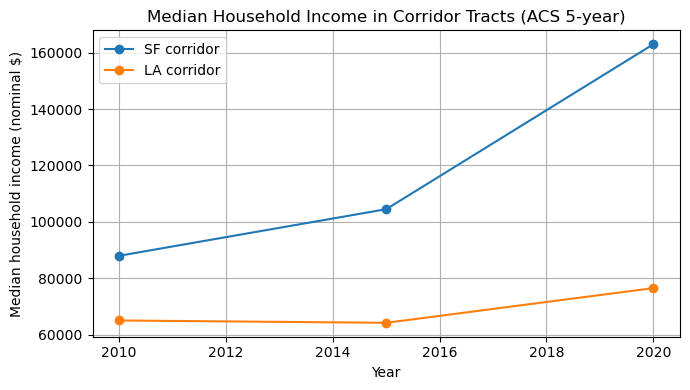

Saved to: C:\Users\Owner\OneDrive - University of Iowa\Gypsy - University of Iowa\Bo\Research_Project\fig_median_income_corridors.png


In [100]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# --- OUTPUT FOLDER (edit if yours is different) ---
OUTPUT_DIR = Path(r"C:\Users\Owner\OneDrive - University of Iowa\Gypsy - University of Iowa\Bo\Research_Project")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

# --- helper: add race shares + clean income ---
def add_race_shares_and_income(df):
    df = df.copy()

    # race shares (B03002 table)
    df["pct_white"]    = df["B03002_003E"] / df["B03002_001E"] * 100
    df["pct_asian"]    = df["B03002_006E"] / df["B03002_001E"] * 100
    df["pct_hispanic"] = df["B03002_012E"] / df["B03002_001E"] * 100

    # income
    df["median_income"] = pd.to_numeric(df["B19013_001E"], errors="coerce")

    # clean obvious bad/sentinel values
    df.loc[df["median_income"] <= 0, "median_income"] = np.nan
    df.loc[df["median_income"] > 1_000_000, "median_income"] = np.nan

    return df

# --- corridor-only slices (uses your existing corridor id lists) ---
sf_corridor_income_race = sf_income_race[sf_income_race["GEOID"].isin(sf_corridor_ids)].copy()
la_corridor_income_race = la_income_race[la_income_race["GEOID"].isin(la_corridor_ids)].copy()

sf_corridor_income_race = add_race_shares_and_income(sf_corridor_income_race)
la_corridor_income_race = add_race_shares_and_income(la_corridor_income_race)

# --- yearly summaries ---
sf_sum = sf_corridor_income_race.groupby("year")[["median_income","pct_white","pct_asian","pct_hispanic"]].mean()
la_sum = la_corridor_income_race.groupby("year")[["median_income","pct_white","pct_asian","pct_hispanic"]].mean()

# --- FIGURE: median income trend ---
plt.figure(figsize=(7,4))
plt.plot(sf_sum.index, sf_sum["median_income"], marker="o", label="SF corridor")
plt.plot(la_sum.index, la_sum["median_income"], marker="o", label="LA corridor")
plt.title("Median Household Income in Corridor Tracts (ACS 5-year)")
plt.xlabel("Year")
plt.ylabel("Median household income (nominal $)")
plt.grid(True)
plt.legend()
plt.tight_layout()

out = OUTPUT_DIR / "fig_median_income_corridors.png"
plt.savefig(out, dpi=300, bbox_inches="tight")
plt.show()
print("Saved to:", out)

In [104]:
API_KEY = "80abd4873b30c8d5298a073fd9a29a45c9d64b44" 

 

years = [2010, 2015, 2020] 

 

SF_STATE = "06" 

SF_COUNTY = "075" 

 

In [106]:
def get_acs_county_tracts(year, state_fips, county_fips, variables, api_key): 

    base_url = f"https://api.census.gov/data/{year}/acs/acs5" 

    params = { 

        "get": "NAME," + ",".join(variables), 

        "for": "tract:*", 

        "in": f"state:{state_fips} county:{county_fips}", 

        "key": api_key 

    } 

 

    r = requests.get(base_url, params=params) 

    r.raise_for_status() 

    data = r.json() 

 

    df = pd.DataFrame(data[1:], columns=data[0]) 

 

    for v in variables: 

        df[v] = pd.to_numeric(df[v], errors="coerce") 

 

    df["GEOID"] = df["state"] + df["county"] + df["tract"] 

    df["year"] = year 

    return df 

In [109]:
# VARIABLES: income + race (DEFINE ONCE) 

 

acs_vars_income_race = [ 

    "B19013_001E",  # Median household income 

    "B02001_001E",  # Total population 

    "B02001_002E",  # White alone 

    "B02001_005E",  # Asian alone 

    "B02001_003E",  # Black alone 
]

In [111]:
sf_income_race = pd.concat( 

    [ 

        get_acs_county_tracts(y, SF_STATE, SF_COUNTY, acs_vars_income_race, API_KEY) 

        for y in years 

    ], 

    ignore_index=True 

) 

 

sf_income_race.shape 

(638, 11)

In [112]:
# --- DEFINE the list (name must match exactly) --- 

acs_vars_income_race = [ 

    "B19013_001E",  # median household income 

    "B02001_001E",  # total pop 

    "B02001_002E",  # white alone 

    "B02001_003E",  # black alone 

    "B02001_005E",  # asian alone 

] 

 

# quick proof it exists 

print("Defined:", acs_vars_income_race) 

 

# --- now use it immediately --- 

sf_income_race = pd.concat( 

    [get_acs_county_tracts(y, SF_STATE, SF_COUNTY, acs_vars_income_race, API_KEY) for y in years], 

    ignore_index=True 

) 

 

sf_income_race.shape 

Defined: ['B19013_001E', 'B02001_001E', 'B02001_002E', 'B02001_003E', 'B02001_005E']


(638, 11)

In [114]:
print("sf_demog_all exists:", "sf_demog_all" in globals()) 

print("la_demog_all exists:", "la_demog_all" in globals()) 

sf_demog_all exists: False
la_demog_all exists: False


In [116]:
import requests 

import pandas as pd 

 

API_KEY = "80abd4873b30c8d5298a073fd9a29a45c9d64b44" 

 

years = [2010, 2015, 2020] 

SF_STATE, SF_COUNTY = "06", "075" 

LA_STATE, LA_COUNTY = "06", "037" 

 

# Income 

vars_income = ["B19013_001E"]  # median household income 

 

# Race / Ethnicity (B03002) 

vars_race = [ 

    "B03002_001E",  # total 

    "B03002_003E",  # White alone, not Hispanic 

    "B03002_006E",  # Asian alone, not Hispanic 

    "B03002_012E",  # Hispanic or Latino (any race) 

] 

 

# Education (B15003) 

# Total 25+ and Bachelor's+ buckets 

vars_edu = [ 

    "B15003_001E",  # Total 25+ 

    "B15003_022E",  # Bachelor's 

    "B15003_023E",  # Master's 

    "B15003_024E",  # Professional school 

    "B15003_025E",  # Doctorate 

] 

 

vars_inc_race = vars_income + vars_race 

 

In [119]:
def get_acs_county_tracts(year, state_fips, county_fips, variables, api_key): 

    base_url = f"https://api.census.gov/data/{year}/acs/acs5" 

    params = { 

        "get": "NAME," + ",".join(variables), 

        "for": "tract:*", 

        "in": f"state:{state_fips} county:{county_fips}", 

        "key": api_key 

    } 

 

    r = requests.get(base_url, params=params) 

 

    # Helpful debug if something goes wrong 

    if r.status_code != 200: 

        print("STATUS:", r.status_code) 

        print("URL:", r.url) 

        print("RESPONSE (first 500 chars):", r.text[:500]) 

        r.raise_for_status() 

 

    data = r.json() 

    df = pd.DataFrame(data[1:], columns=data[0]) 

 

    for v in variables: 

        df[v] = pd.to_numeric(df[v], errors="coerce") 

 

    df["GEOID"] = df["state"] + df["county"] + df["tract"] 

    df["year"] = int(year) 

    return df 

In [121]:
import requests 

import pandas as pd 

 

years = [2010, 2015, 2020] 

SF_STATE, SF_COUNTY = "06", "075" 

LA_STATE, LA_COUNTY = "06", "037" 

 

# what we WANT (Bachelor's+ components) 

edu_candidates = [ 

    "B15003_001E",  # total 25+ 

    "B15003_022E",  # Bachelor's 

    "B15003_023E",  # Master's 

    "B15003_024E",  # Professional school 

    "B15003_025E",  # Doctorate 

] 

 

def get_var_set(year): 

    url = f"https://api.census.gov/data/{year}/acs/acs5/variables.json" 

    r = requests.get(url) 

    r.raise_for_status() 

    return set(r.json()["variables"].keys()) 

 

for y in years: 

    avail = get_var_set(y) 

    missing = [v for v in edu_candidates if v not in avail] 

    print(y, "missing:", missing) 

 

2010 missing: ['B15003_001E', 'B15003_022E', 'B15003_023E', 'B15003_024E', 'B15003_025E']
2015 missing: []
2020 missing: []


In [122]:
# ---------- EDUCATION (B15003) works for 2015+ only ---------- 

edu_years = [2015, 2020] 

 

edu_vars = [ 

    "B15003_001E",  # Total 25+ 

    "B15003_022E",  # Bachelor's 

    "B15003_023E",  # Master's 

    "B15003_024E",  # Professional school 

    "B15003_025E",  # Doctorate 

] 

 

sf_edu_all = pd.concat( 

    [get_acs_county_tracts(y, SF_STATE, SF_COUNTY, edu_vars, API_KEY) for y in edu_years], 

    ignore_index=True 

) 

 

la_edu_all = pd.concat( 

    [get_acs_county_tracts(y, LA_STATE, LA_COUNTY, edu_vars, API_KEY) for y in edu_years], 

    ignore_index=True 

) 

 

sf_edu_all.shape, la_edu_all.shape 

((441, 11), (4844, 11))

In [123]:
sf_corridor_edu = sf_edu_all[sf_edu_all["GEOID"].isin(sf_corridor_ids)].copy() 

la_corridor_edu = la_edu_all[la_edu_all["GEOID"].isin(la_corridor_ids)].copy() 

 

sf_corridor_edu["ba_plus"] = ( 

    sf_corridor_edu["B15003_022E"] + sf_corridor_edu["B15003_023E"] + 

    sf_corridor_edu["B15003_024E"] + sf_corridor_edu["B15003_025E"] 

) 

la_corridor_edu["ba_plus"] = ( 

    la_corridor_edu["B15003_022E"] + la_corridor_edu["B15003_023E"] + 

    la_corridor_edu["B15003_024E"] + la_corridor_edu["B15003_025E"] 

) 

 

sf_corridor_edu["ba_plus_pct"] = (sf_corridor_edu["ba_plus"] / sf_corridor_edu["B15003_001E"]) * 100 

la_corridor_edu["ba_plus_pct"] = (la_corridor_edu["ba_plus"] / la_corridor_edu["B15003_001E"]) * 100 

 

sf_ba_by_year = sf_corridor_edu.groupby("year")["ba_plus_pct"].mean() 

la_ba_by_year = la_corridor_edu.groupby("year")["ba_plus_pct"].mean() 

 

sf_ba_by_year, la_ba_by_year 

 

(year
 2015    71.597618
 2020    76.677298
 Name: ba_plus_pct, dtype: float64,
 year
 2015    37.213170
 2020    41.258507
 Name: ba_plus_pct, dtype: float64)

<Figure size 700x400 with 0 Axes>

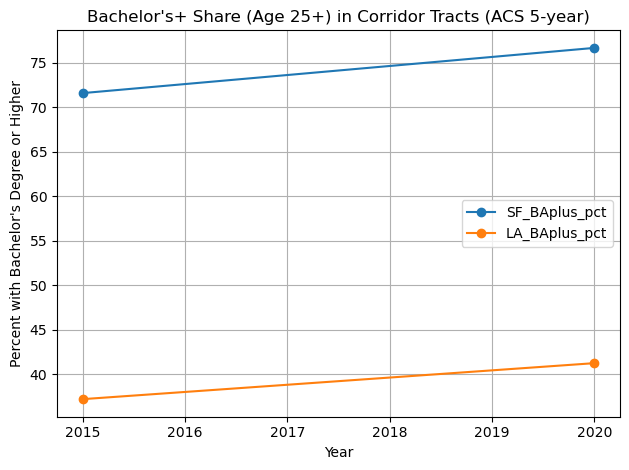

Saved to: C:\Users\Owner\OneDrive - University of Iowa\Gypsy - University of Iowa\Bo\Research_Project\fig_ba_plus_share.png


In [125]:
import matplotlib.pyplot as plt
import pandas as pd

# --- BUILD DATAFRAME ---
edu_plot = pd.DataFrame({
    "SF_BAplus_pct": sf_ba_by_year,
    "LA_BAplus_pct": la_ba_by_year
})

# --- CREATE FIGURE ---
plt.figure(figsize=(7, 4))

edu_plot.plot(marker="o")

plt.title("Bachelor's+ Share (Age 25+) in Corridor Tracts (ACS 5-year)")
plt.ylabel("Percent with Bachelor's Degree or Higher")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()

# --- SAVE + EXPORT ---
out = OUTPUT_DIR / "fig_ba_plus_share.png"
plt.savefig(out, dpi=300, bbox_inches="tight")

plt.show()
print("Saved to:", out)


In [126]:
import pandas as pd

targets = {"B19013_001E", "B03002_001E", "B03002_003E", "B03002_006E", "B03002_012E", "GEOID", "year"}

candidates = []
for name, obj in list(globals().items()):
    if isinstance(obj, pd.DataFrame) and targets.issubset(set(obj.columns)):
        candidates.append((name, obj.shape))

candidates


[('la_income_race', (7190, 11)),
 ('sf_corridor_income_race', (23, 15)),
 ('la_corridor_income_race', (104, 15))]

In [127]:
# --- SF corridor only ---
sf_corridor_income_race = sf_income_race[
    sf_income_race["GEOID"].isin(sf_corridor_ids)
].copy()

sf_corridor_income_race.shape


(23, 11)

In [133]:
# --- LA corridor only ---
la_corridor_income_race = la_income_race[
    la_income_race["GEOID"].isin(la_corridor_ids)
].copy()

la_corridor_income_race.shape


(104, 11)

In [135]:
# Income + race variables (DEFINE ONCE) 

acs_vars_income_race = [ 

    "B19013_001E",  # Median household income 

    "B03002_001E",  # Total population 

    "B03002_003E",  # White alone, not Hispanic 

    "B03002_006E",  # Asian alone, not Hispanic 
]

In [137]:
# ---- Define the variable list ONCE (income + race table B03002) ---- 

acs_vars_income_race = [ 

    "B19013_001E",  # median household income 

    "B03002_001E",  # total population 

    "B03002_003E",  # White alone, not Hispanic 

    "B03002_006E",  # Asian alone, not Hispanic 

    "B03002_012E",  # Hispanic / Latino (any race) 

] 

 

years = [2010, 2015, 2020] 

SF_STATE, SF_COUNTY = "06", "075" 

LA_STATE, LA_COUNTY = "06", "037" 

 

# ---- Pull SF first ---- 

sf_income_race = pd.concat( 

    [ 

        get_acs_county_tracts(y, SF_STATE, SF_COUNTY, acs_vars_income_race, API_KEY) 

        for y in years 

    ], 

    ignore_index=True 

) 

 

# ---- Then LA ---- 

la_income_race = pd.concat( 

    [ 

        get_acs_county_tracts(y, LA_STATE, LA_COUNTY, acs_vars_income_race, API_KEY) 

        for y in years 

    ], 

    ignore_index=True 

) 

 

sf_income_race.shape, la_income_race.shape 

 

((638, 11), (7190, 11))

In [138]:
sf_corridor_income_race = sf_income_race[ 

    sf_income_race["GEOID"].isin(sf_corridor_ids) 

].copy() 

 

la_corridor_income_race = la_income_race[ 

    la_income_race["GEOID"].isin(la_corridor_ids) 

].copy() 

 

sf_corridor_income_race.shape, la_corridor_income_race.shape 

((23, 11), (104, 11))

In [139]:
def add_race_shares(df): 

    df = df.copy() 

    # avoid divide-by-zero 

    df["pct_white"] = (df["B03002_003E"] / df["B03002_001E"]).replace([float("inf"), -float("inf")], pd.NA) * 100 

    df["pct_asian"] = (df["B03002_006E"] / df["B03002_001E"]).replace([float("inf"), -float("inf")], pd.NA) * 100 

    df["pct_hispanic"] = (df["B03002_012E"] / df["B03002_001E"]).replace([float("inf"), -float("inf")], pd.NA) * 100 

    return df 

 

sf_corridor_income_race = add_race_shares(sf_corridor_income_race) 

la_corridor_income_race = add_race_shares(la_corridor_income_race) 

 

# Corridor summaries by year (mean across corridor tracts) 

sf_summary = sf_corridor_income_race.groupby("year").agg( 

    median_income=("B19013_001E", "mean"), 

    pct_white=("pct_white", "mean"), 

    pct_asian=("pct_asian", "mean"), 

    pct_hispanic=("pct_hispanic", "mean"), 

).sort_index() 

 

la_summary = la_corridor_income_race.groupby("year").agg( 

    median_income=("B19013_001E", "mean"), 

    pct_white=("pct_white", "mean"), 

    pct_asian=("pct_asian", "mean"), 

    pct_hispanic=("pct_hispanic", "mean"), 

).sort_index() 

 

sf_summary, la_summary 

(      median_income  pct_white  pct_asian  pct_hispanic
 year                                                   
 2010   87965.333333  66.841272  17.257837      7.891151
 2015  104487.111111  64.688892  20.331404      8.344983
 2020  162983.600000  65.066751  19.989956      6.629800,
       median_income  pct_white  pct_asian  pct_hispanic
 year                                                   
 2010   6.501110e+04  37.605081  17.242154     36.632690
 2015   6.418668e+04  36.836311  16.086192     37.472987
 2020  -1.441793e+07  33.770499  17.140719     38.614865)

In [140]:
import numpy as np

# 1) Clean the raw ACS income column (B19013_001E)
def clean_b19013(df):
    df = df.copy()
    df["B19013_001E"] = pd.to_numeric(df["B19013_001E"], errors="coerce")

    # Census sentinel/missing -> negative or zero; drop them
    df.loc[df["B19013_001E"] <= 0, "B19013_001E"] = np.nan

    # optional sanity cap (keeps weird junk from skewing)
    df.loc[df["B19013_001E"] > 1_000_000, "B19013_001E"] = np.nan
    return df

sf_corridor_income_race = clean_b19013(sf_corridor_income_race)
la_corridor_income_race = clean_b19013(la_corridor_income_race)

# 2) Rebuild corridor summaries by year (renaming B19013_001E -> median_income)
sf_summary = sf_corridor_income_race.groupby("year").agg(
    median_income=("B19013_001E", "mean"),
    pct_white=("pct_white", "mean"),
    pct_asian=("pct_asian", "mean"),
    pct_hispanic=("pct_hispanic", "mean"),
).sort_index()

la_summary = la_corridor_income_race.groupby("year").agg(
    median_income=("B19013_001E", "mean"),
    pct_white=("pct_white", "mean"),
    pct_asian=("pct_asian", "mean"),
    pct_hispanic=("pct_hispanic", "mean"),
).sort_index()

sf_summary, la_summary


(      median_income  pct_white  pct_asian  pct_hispanic
 year                                                   
 2010   87965.333333  66.841272  17.257837      7.891151
 2015  104487.111111  64.688892  20.331404      8.344983
 2020  162983.600000  65.066751  19.989956      6.629800,
       median_income  pct_white  pct_asian  pct_hispanic
 year                                                   
 2010   65011.103448  37.605081  17.242154     36.632690
 2015   64186.678571  36.836311  16.086192     37.472987
 2020   76487.444444  33.770499  17.140719     38.614865)

In [145]:
summary = pd.concat( 

    { 

        "SF_corridor": sf_summary, 

        "LA_corridor": la_summary 

    }, 

    axis=1 

) 

 

summary_pretty = summary.copy() 

 

# dollars as $#,### 

for col in summary_pretty.columns: 

    if col[1] == "median_income": 

        summary_pretty[col] = summary_pretty[col].map(lambda x: f"${x:,.0f}" if pd.notna(x) else "") 

    else: 

        summary_pretty[col] = summary_pretty[col].map(lambda x: f"{x:,.1f}%" if pd.notna(x) else "") 

 

summary_pretty 

SF_corridor                                    LA_corridor            \
     median_income pct_white pct_asian pct_hispanic median_income pct_white   
year                                                                          
2010       $87,965     66.8%     17.3%         7.9%       $65,011     37.6%   
2015      $104,487     64.7%     20.3%         8.3%       $64,187     36.8%   
2020      $162,984     65.1%     20.0%         6.6%       $76,487     33.8%   

                             
     pct_asian pct_hispanic  
year                         
2010     17.2%        36.6%  
2015     16.1%        37.5%  
2020     17.1%        38.6%

In [147]:
summary.to_csv("corridor_income_race_summary.csv")

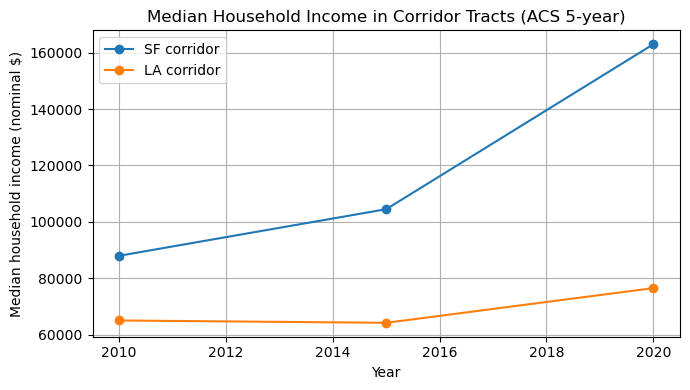

Saved to: C:\Users\Owner\OneDrive - University of Iowa\Gypsy - University of Iowa\Bo\Research_Project\fig_income_trend.png


In [149]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))

plt.plot(
    sf_summary.index,
    sf_summary["median_income"],
    marker="o",
    label="SF corridor"
)

plt.plot(
    la_summary.index,
    la_summary["median_income"],
    marker="o",
    label="LA corridor"
)

plt.title("Median Household Income in Corridor Tracts (ACS 5-year)")
plt.xlabel("Year")
plt.ylabel("Median household income (nominal $)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# --- SAVE + EXPORT ---
out = OUTPUT_DIR / "fig_income_trend.png"
plt.savefig(out, dpi=300, bbox_inches="tight")

plt.show()
print("Saved to:", out)


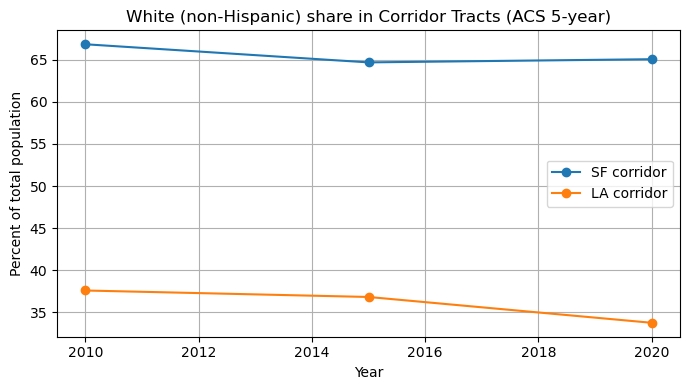

Saved to: C:\Users\Owner\OneDrive - University of Iowa\Gypsy - University of Iowa\Bo\Research_Project\fig_white_share.png


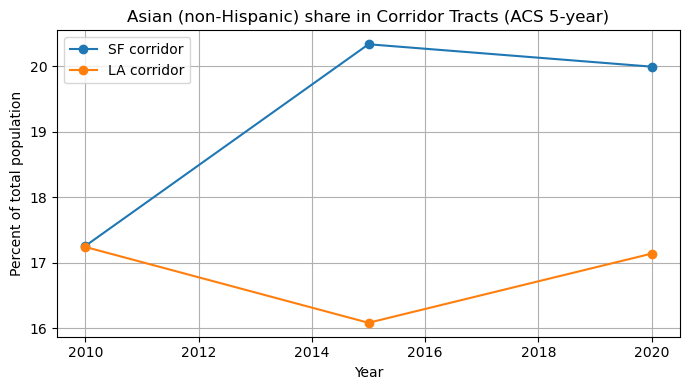

Saved to: C:\Users\Owner\OneDrive - University of Iowa\Gypsy - University of Iowa\Bo\Research_Project\fig_asian_share.png


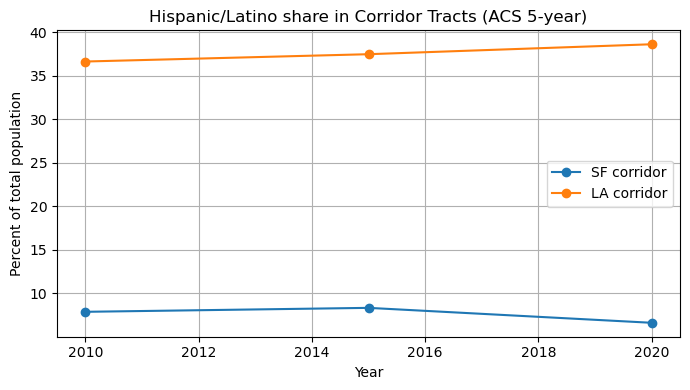

Saved to: C:\Users\Owner\OneDrive - University of Iowa\Gypsy - University of Iowa\Bo\Research_Project\fig_hispanic_share.png


In [151]:
import matplotlib.pyplot as plt

races = ["pct_white", "pct_asian", "pct_hispanic"]

titles = {
    "pct_white": "White (non-Hispanic) share",
    "pct_asian": "Asian (non-Hispanic) share",
    "pct_hispanic": "Hispanic/Latino share",
}

filenames = {
    "pct_white": "fig_white_share.png",
    "pct_asian": "fig_asian_share.png",
    "pct_hispanic": "fig_hispanic_share.png",
}

for r in races:
    plt.figure(figsize=(7, 4))

    plt.plot(sf_summary.index, sf_summary[r], marker="o", label="SF corridor")
    plt.plot(la_summary.index, la_summary[r], marker="o", label="LA corridor")

    plt.title(f"{titles[r]} in Corridor Tracts (ACS 5-year)")
    plt.xlabel("Year")
    plt.ylabel("Percent of total population")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    out = OUTPUT_DIR / filenames[r]
    plt.savefig(out, dpi=300, bbox_inches="tight")
    plt.show()
    print("Saved to:", out)


In [153]:
intervals = [(2010, 2015), (2015, 2020)]
rows = []

for start, end in intervals:
    row = {"interval": f"{start}-{end}"}

    # SF
    row["SF_income_$chg"] = sf_summary.loc[end, "median_income"] - sf_summary.loc[start, "median_income"]
    row["SF_income_%chg"] = (sf_summary.loc[end, "median_income"] / sf_summary.loc[start, "median_income"] - 1) * 100
    for r in ["pct_white", "pct_asian", "pct_hispanic"]:
        row[f"SF_{r}_pp"] = sf_summary.loc[end, r] - sf_summary.loc[start, r]  # percentage points

    # LA
    row["LA_income_$chg"] = la_summary.loc[end, "median_income"] - la_summary.loc[start, "median_income"]
    row["LA_income_%chg"] = (la_summary.loc[end, "median_income"] / la_summary.loc[start, "median_income"] - 1) * 100
    for r in ["pct_white", "pct_asian", "pct_hispanic"]:
        row[f"LA_{r}_pp"] = la_summary.loc[end, r] - la_summary.loc[start, r]

    rows.append(row)

change_table = pd.DataFrame(rows).set_index("interval")

# pretty copy version
change_pretty = change_table.copy()
for c in change_pretty.columns:
    if c.endswith("_$chg"):
        change_pretty[c] = change_pretty[c].map(lambda x: f"${x:,.0f}")
    elif c.endswith("_%chg"):
        change_pretty[c] = change_pretty[c].map(lambda x: f"{x:,.1f}%")
    else:  # percentage points
        change_pretty[c] = change_pretty[c].map(lambda x: f"{x:+.1f} pp")

change_pretty


,SF_income_$chg,SF_income_%chg,SF_pct_white_pp,SF_pct_asian_pp,SF_pct_hispanic_pp,LA_income_$chg,LA_income_%chg,LA_pct_white_pp,LA_pct_asian_pp,LA_pct_hispanic_pp
interval,,,,,,,,,,
2010-2015,"$16,522",18.8%,-2.2 pp,+3.1 pp,+0.5 pp,$-824,-1.3%,-0.8 pp,-1.2 pp,+0.8 pp
2015-2020,"$58,496",56.0%,+0.4 pp,-0.3 pp,-1.7 pp,"$12,301",19.2%,-3.1 pp,+1.1 pp,+1.1 pp


In [155]:
sf_summary.to_csv("sf_corridor_demographics.csv")
la_summary.to_csv("la_corridor_demographics.csv")
comparison.to_csv("sf_la_property_values_real.csv")


In [157]:
import os

In [159]:
import matplotlib.pyplot as plt
import os
 
output_dir = r"C:\Users\Owner\OneDrive\Gypsy-University of Iowa\Bo\Research_Project"
 
for i in plt.get_fignums():
    fig = plt.figure(i)
    filename = os.path.join(output_dir, f"figure_{i}.png")
    fig.savefig(filename, dpi=300, bbox_inches="tight")
    print(f"Saved {filename}")
